In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk
import astropy.timeseries as ts
from astropy import units as u
import rubin_rotation as rr
# import butterpy as bp
from tessifystarspot import *

In [2]:
tess_ts = lk.search_lightcurve('16 Cyg B', sector=14).download()
time = tess_ts.time.value

/home/isy/.local/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [35]:
prot = 5
tau_range=(1, 3)

sin2incl = np.random.uniform(np.sin(0)**2, np.sin(np.pi/2)**2)
incl = np.arcsin(sin2incl**.5)
tau = np.exp(np.random.uniform(np.log(tau_range[0]*prot), np.log(tau_range[1]*prot)))

In [36]:
# Get LC
res0, res1 = rr.mklc(time, incl=incl, tau=tau, p=prot)
nspot, ff, amp_err = res0
_, area_tot, dF_tot, dF_tot0 = res1
pure_flux = dF_tot0 / np.median(dF_tot0) - 1

In [55]:
err = 0.005

flux = pure_flux + np.random.randn(len(time)) * err
flux_err = np.ones_like(flux)*err

In [83]:
np.c_[time, flux][:,1].shape

(18424,)

<IPython.core.display.Javascript object>


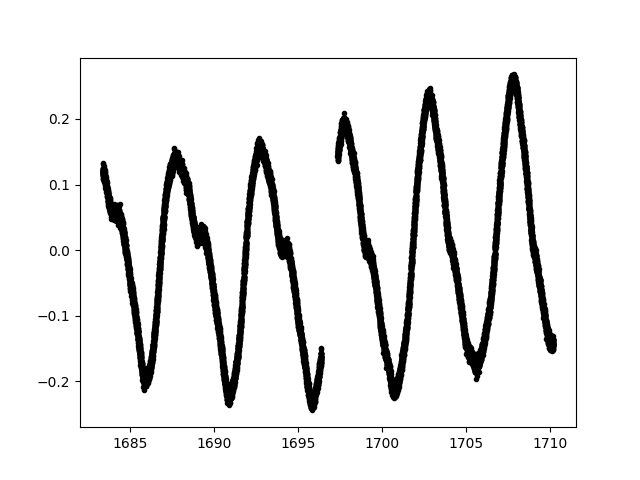

In [56]:
%matplotlib notebook
plt.plot(time, flux, 'k.')

In [61]:
# freq, ps = ts.LombScargle(time, flux).autopower(nyquist_factor=1, samples_per_peak=30)
# per = 1/freq
# print(per[np.argmax(ps)])

freq, ps = ts.LombScargle(time, flux, nterms=2).autopower(nyquist_factor=1, samples_per_peak=30)
per = 1/freq
period = per[np.argmax(ps)]

<IPython.core.display.Javascript object>


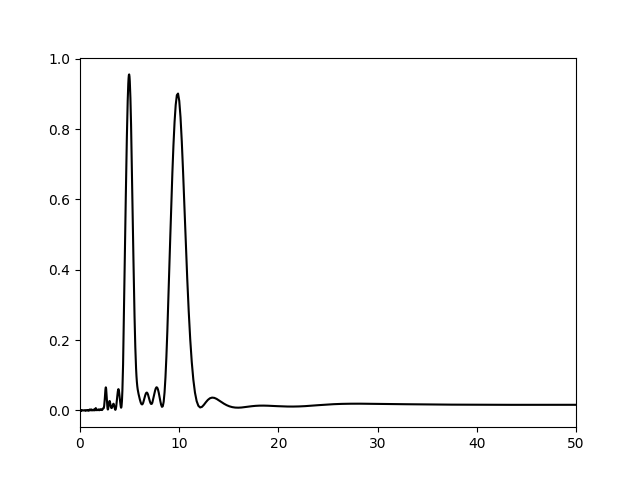

(0.0, 50.0)

In [58]:
%matplotlib notebook
plt.plot(per, ps, 'k-')
plt.xlim(0,50)

In [62]:
fold = lk.LightCurve(time=time * u.d, flux=flux * u.d).fold(period)
model = ts.LombScargle(fold.time.value, fold.flux.value, nterms=2).model(fold.time.value, 1/period)

<IPython.core.display.Javascript object>


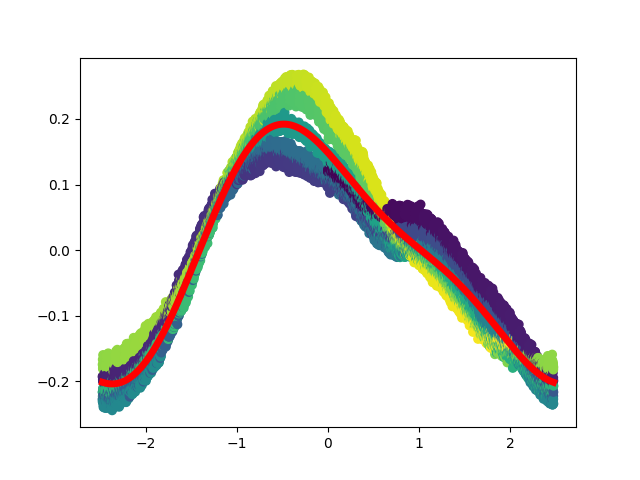

In [67]:
%matplotlib notebook
plt.scatter(fold.time.value, fold.flux.value, c=fold.time_original.value)
plt.plot(fold.time.value, model, c='r', lw=5)

In [11]:
sample_size = 100

In [54]:
# fluxes = np.zeros((sample_size, len(time)))
# dayrange = np.arange(1,51)
# period1 = np.resize(dayrange,sample_size)
# range2 = np.arange(1,11)
# period2 = np.resize(range2,sample_size)
# for s in range(sample_size):
#     fluxes[s,:] = np.sin(2 * np.pi * time / period1[s])
#     if s > 50:
#         fluxes[s,:] += np.sin(2 * np.pi * time / period2[s])

In [55]:
ls1_p = np.zeros(sample_size)
ls2_p = np.zeros(sample_size)

In [56]:
for s in range(sample_size):
    freq, ps = ts.LombScargle(time, fluxes[s,:]).autopower(nyquist_factor=1, samples_per_peak=30)
    per = 1/freq
    ls1_p[s] = per[np.argmax(ps)]
    
    freq, ps = ts.LombScargle(time, fluxes[s,:], nterms=2).autopower(nyquist_factor=1, samples_per_peak=30)
    per = 1/freq
    ls2_p[s] = per[np.argmax(ps)]

<IPython.core.display.Javascript object>


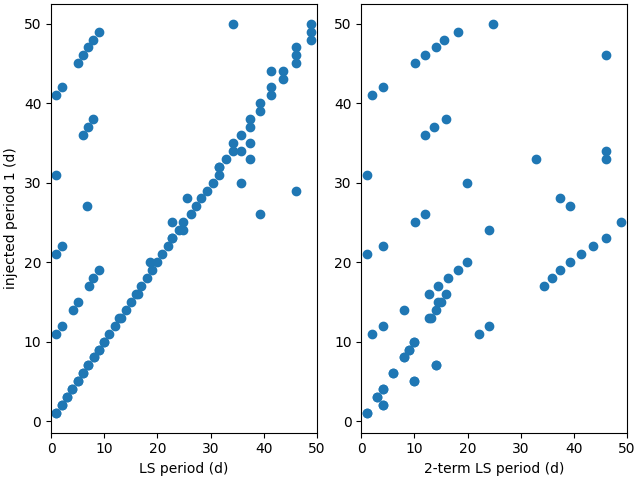

[Text(0.5, 0, '2-term LS period (d)'), (0.0, 50.0)]

In [58]:
%matplotlib notebook

fig, ax = plt.subplots(1,2, constrained_layout=True)

ax[0].scatter(ls1_p, period1)
ax[0].set(xlabel='LS period (d)', ylabel='injected period 1 (d)', xlim=(0,50))

ax[1].scatter(ls2_p, period1)
ax[1].set(xlabel='2-term LS period (d)', xlim=(0,50))